# Fundamentos de Machine Learning

<br>
<br>

Ao longo deste notebook, iremos começar nossa jornada no mundo de aprendizado de máquina e discutir em mais detalhes alguns pontos importantes no tema. 

In [1]:
#Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset_modulo_8.csv")
df.head()

,Unnamed: 0,Anos de Estudo,Salário
0,0,2.0,1559.0
1,1,4.0,3312.0
2,2,6.0,2078.0
3,3,7.0,3758.0
4,4,9.0,11724.0


In [3]:
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,Anos de Estudo,Salário
0,2.0,1559.0
1,4.0,3312.0
2,6.0,2078.0
3,7.0,3758.0
4,9.0,11724.0


In [4]:
df.shape

(20, 2)

O dataset acima - df - contém duas variáveis, descrevendo a quantidade de anos de estudo de uma certa pessoa, bem como o seu salário. __Vale salientar que este dataset foi construído apenas para fins educacionais.__  

### Questão: Prever o salário de uma pessoa, a partir da quantidade de anos estudados.

Primeiramente, identificamos que a questão trata-se de um problema de __aprendizado supervisionado__. Ainda, a variável target é a variável salário, que é uma variável numérica, de modo que estamos diante de um problema de __regressão.__

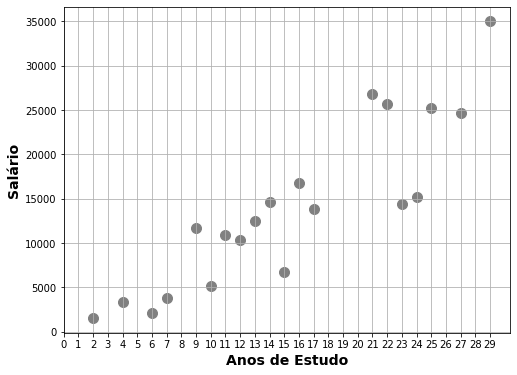

In [5]:
#plot da dispersão entre as variáveis

plt.figure(figsize=[8,6])
plt.scatter(df['Anos de Estudo'], df['Salário'], s = 100, c = 'gray')
plt.xlabel("Anos de Estudo", fontweight = 'bold', fontsize = 14)
plt.ylabel("Salário", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,30))
plt.grid()
plt.show()

Aparenta existir um __padrão__ quando olhamos para a distribuição dos dados!

Esse padrão parece ser linear!

Vamos __descrever o salário como uma função linear dos anos de estudo:__
        
        
### Salario = $\theta_0$ + $\theta_1$ x Anos de estudo
 
 
O modelo acima possui 2 parâmetros: $\theta_0$ e $\theta_1$. Variando esses dois parâmetros, teremos modelos diferentes, correspondendo a retas diferentes:

In [6]:
def funcao_linear(x, theta0, theta1):
    pred = theta0 + theta1 * x
    pred.name = None
    return pred

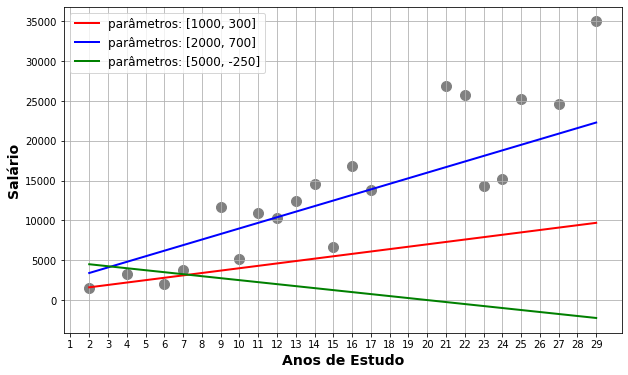

In [7]:
X = df['Anos de Estudo']
y1 = funcao_linear(X, theta0 = 1000, theta1 = 300)  # salario = 1000 + 300 * anos_estudo
y2 = funcao_linear(X, theta0 = 2000, theta1 = 700)  # salario = 2000 + 700 * anos_estudo
y3 = funcao_linear(X, theta0 = 5000, theta1 = -250) # salario = 5000 - 250 * anos_estudo


plt.figure(figsize=[10,6])
plt.scatter(df['Anos de Estudo'], df['Salário'], s = 100, c = 'gray')
plt.xlabel("Anos de Estudo", fontweight = 'bold', fontsize = 14)
plt.ylabel("Salário", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,30))
plt.grid()

plt.plot(X, y1, label = 'parâmetros: [1000, 300]', lw = 2, c = 'red')
plt.plot(X, y2, label = 'parâmetros: [2000, 700]', lw = 2, c = 'blue')
plt.plot(X, y3, label = 'parâmetros: [5000, -250]', lw = 2, c = 'green')
plt.legend(fontsize = 12)
plt.show()

Cada reta corresponde a um modelo distinto. 

Qual modelo que melhor descreve o comportamento dos dados?!

Intuitivamente, o modelo "azul", descrito pelos parâmetros $\theta_0$ = 2000 e $\theta_1$ = 700.

Para sermos mais precisos, precisamos de uma __métrica de performance__, afim de comparar diferentes modelos.

### __Métrica de Performance para modelos de Regressão: Erro médio quadrático__ 
#### (Sigla MSE, em inglês "mean squared error")


Vamos denotar por X o conjunto de variáveis explicativas e y a variável target.

Tendo fixado os parâmetros $\theta_0$ e $\theta_1$, denotemos a predição do modelo por y_pred.

No exemplo acima, temos:



In [8]:
X = df['Anos de Estudo']
X

0      2.0
1      4.0
2      6.0
3      7.0
4      9.0
5     10.0
6     11.0
7     12.0
8     13.0
9     14.0
10    15.0
11    16.0
12    17.0
13    21.0
14    22.0
15    23.0
16    24.0
17    25.0
18    27.0
19    29.0
Name: Anos de Estudo, dtype: float64

In [9]:
y = df['Salário']
y

0      1559.0
1      3312.0
2      2078.0
3      3758.0
4     11724.0
5      5128.0
6     10965.0
7     10354.0
8     12457.0
9     14621.0
10     6711.0
11    16826.0
12    13827.0
13    26841.0
14    25739.0
15    14385.0
16    15156.0
17    25268.0
18    24623.0
19    34995.0
Name: Salário, dtype: float64

Ao usarmos a "função linear" acima, tendo fixado os parâmetros (no caso $\theta_0 = 2000$ e $\theta_1 = 700$), temos uma reta bem definida que descreve a relação entre X (anos de estudo) e y (salário). Desta forma, podemos fazer predições de salários a partir da quantidade de anos estudados.

In [10]:
y_pred = funcao_linear(X, theta0 = 2000, theta1 = 700)
y_pred

0      3400.0
1      4800.0
2      6200.0
3      6900.0
4      8300.0
5      9000.0
6      9700.0
7     10400.0
8     11100.0
9     11800.0
10    12500.0
11    13200.0
12    13900.0
13    16700.0
14    17400.0
15    18100.0
16    18800.0
17    19500.0
18    20900.0
19    22300.0
dtype: float64

O __Erro Médio Quadrático__ é dado pela fórmula:
    
###  $1/{N} \cdot \sum_i{(y_i - y_{pred_i})^{2}}$,

onde a soma é dada em todas as linhas do dataset e N é a quantidade de linhas (instâncias) do dataset.

__Uma métrica muito comum de se usar é a raíz quadrada do erro médio quadrático, representata por RMSE.__


Visualmente:

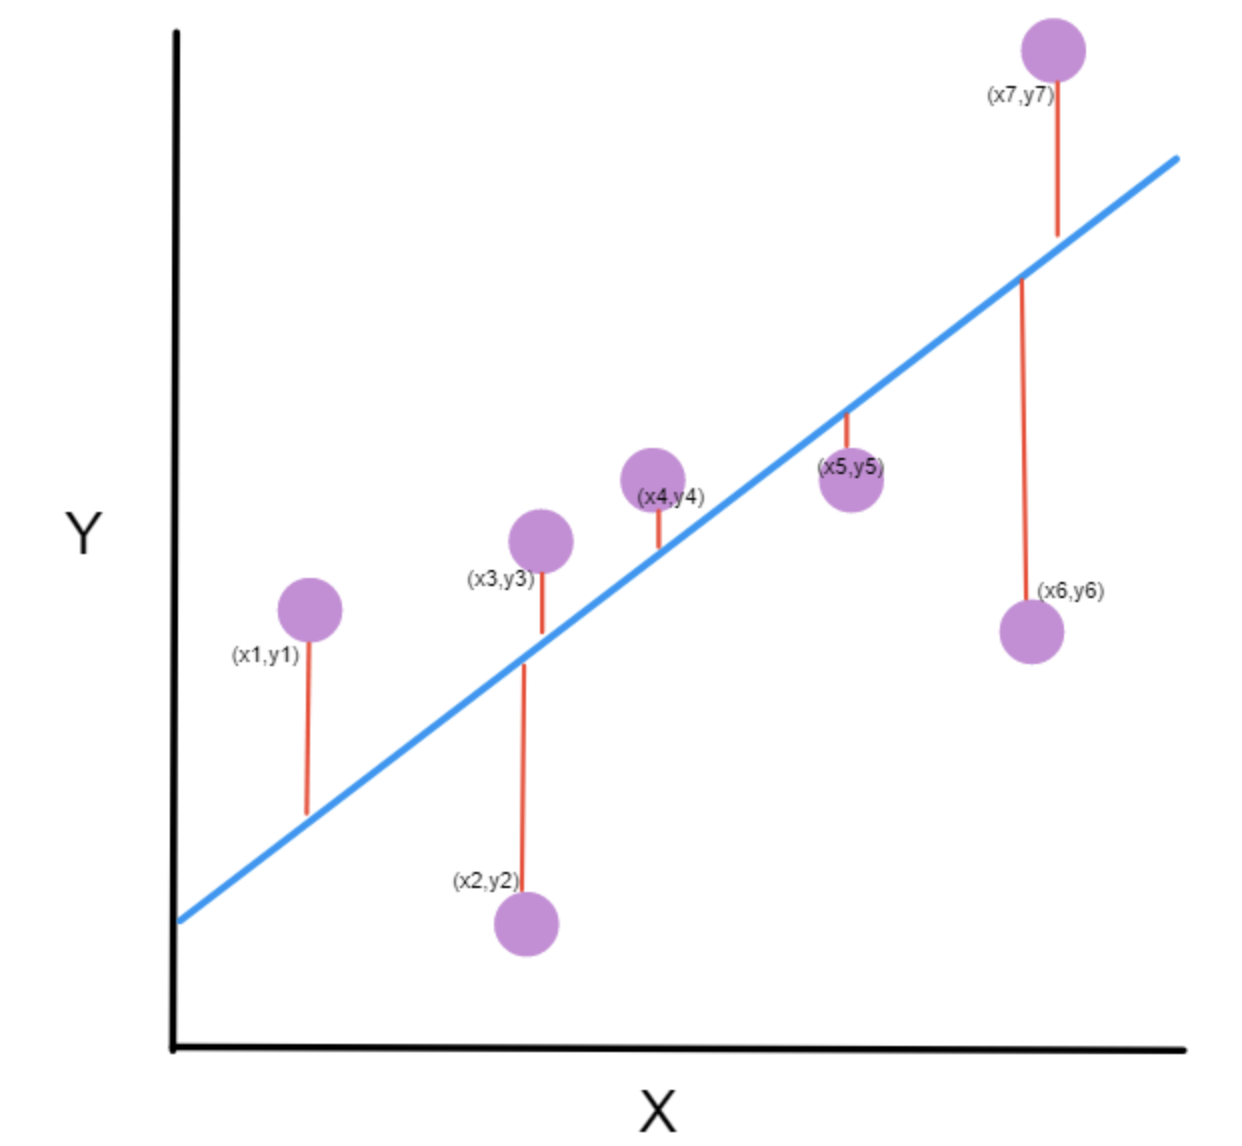

De acordo com a figura, fica evidente que __quanto menor o MSE (e portanto também o RMSE), melhor o modelo!__


Vamos implementar a função RMSE para calcular o erro médio quadrático e testar em nosso problema:

In [11]:
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [12]:
y1 = funcao_linear(X, theta0 = 1000, theta1 = 300)
y2 = funcao_linear(X, theta0 = 2000, theta1 = 700)
y3 = funcao_linear(X, theta0 = 5000, theta1 = -250)

RMSE_1 = RMSE(y = df['Salário'], y_pred = y1)
RMSE_2 = RMSE(y = df['Salário'], y_pred = y2)
RMSE_3 = RMSE(y = df['Salário'], y_pred = y3)

print("Os respectivos RMSE de cada modelo são: ")
print('Modelo 1: ', RMSE_1)
print('Modelo 2: ', RMSE_2)
print('Modelo 3: ', RMSE_3)

Os respectivos RMSE de cada modelo são: 
Modelo 1:  11039.182331585976
Modelo 2:  5123.487732980338
Modelo 3:  16853.927184783966


Analisando o RMSE, fica claro que o modelo que melhor se ajustou aos dados neste problema foi o Modelo 2, como já
havíamos percebido visualmente.

__Pergunta:__ Será que o Modelo 2 é o melhor modelo possível? Ou será que conseguimos outro par de parâmetros $\theta_0$ e 
    $\theta_1$ que tenha um RMSE ainda menor?
    
    
<br><br>

# Modelo de Regressão Linear 

<br>

Considere um dataset X com n linhas e p variáveis, de modo que X tenha dimensão (n, p), e uma variável numérica Y, sendo a variável target.

Podemos representar a relação entre X e Y de forma linhar, como já visto:

## Y = $\theta_0$ + $\theta_1$ $\cdot X_1$ + $\theta_2$ $\cdot X_2$ + .. + $\theta_p$ $\cdot X_p$

O modelo de Regressão Linear é o __modelo linear cujos parâmetros minimizam o MSE.__

<br>

## Modelo de Regressão Linear Simples

É o modelo de regressão linear, com apenas uma variável preditora. Neste caso, X tem dimensão (n, 1) e a relação é:

### Y = $\theta_0$ + $\theta_1$ $\cdot X_1$

<br>

Desta forma, imagine que pudéssemos testar todos as combinações de $\theta_0$ e $\theta_1$. Então a combinação que gerasse o menor MSE, seria o modelo de regressão linear simples.

Na figura abaixo, criamos uma malha de pontos simulando várias combinações de $\theta_0$ e $\theta_1$ e calculamos o RMSE em cada uma dessas combinações. Visualmente, conseguimos notar a diferença do MSE para diferentes combinações:

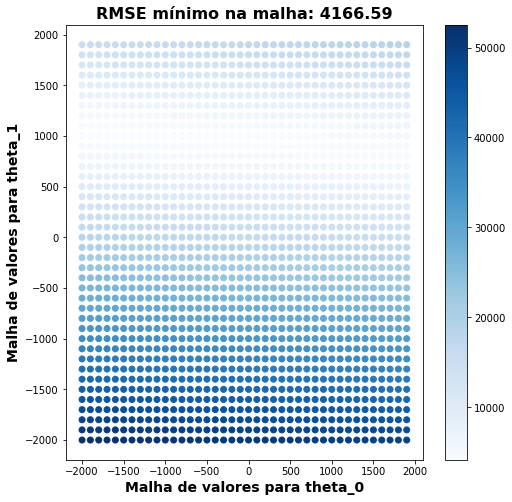

In [13]:
thetas_0 = np.arange(-2000,2000,100)
thetas_1 = np.arange(-2000,2000,100)

grid0, grid1 = np.meshgrid(thetas_0, thetas_1)
grid0 = np.ravel(grid0)
grid1 = np.ravel(grid1)

X = df['Anos de Estudo']
y = df['Salário']

RMSE_list = [RMSE(y = y, y_pred = funcao_linear(x = X, theta0 = t[0], theta1 = t[1])) for t in zip(grid0, grid1)]

RMSE_min = np.min(RMSE_list)

plt.figure(figsize=[8,8])
plt.title("RMSE mínimo na malha: " + str(np.round(RMSE_min,2)), fontweight = 'bold', fontsize = 16)
plt.scatter(grid0, grid1, c = RMSE_list, cmap = plt.cm.Blues)
plt.xlabel("Malha de valores para theta_0", fontweight = 'bold', fontsize = 14)
plt.ylabel("Malha de valores para theta_1", fontweight = 'bold', fontsize = 14)
plt.colorbar()
plt.show()

Na prática, não precisamos fazer essas simulações acima para descobrir a melhor combinação de parâmetros. Existem algoritmos específicos para resolver esse problema - inclusive, iremos abordá-los em módulos posteriores no curso -.

Vamos estar utilizando a biblioteca __scikit-learn__ para nossos modelos de aprendizado de máquina:
(link: https://scikit-learn.org/stable/ )

Esta biblioteca é muito útil e prática no contexto de aprendizado de máquina, devido a sua grande simplicidade de uso, bem como a vasta quantidade de algoritmos já implementados. Para usá-la, essencialmente seguiremos os passos:

1 - __Instanciar__ o algoritmo;

2 - __fitar__ o algoritmo aos dados: (equivalente a __treinar o modelo com os dados__)

    2.1 (Aprendizado supervisionado): precisaremos fornecer 2 arrays - X, y - para este médoto. O formato dos arrays deve ser (n, k) para o array X e (n, 1) para o array y.
    
    2.2 (Aprendizado não supervisionado): precisaremos fornecer 1 array - X - para este médoto. O formato dos array deve ser (n, k).
    
3 - Com o algoritmo já treinado - fitado - podemos fazer __predições__.

Para o problema de regressão acima, vamos importar o modelo de regressão linear.



In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#instanciando o algoritmo

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
type(X), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

In [17]:
#ajustando os dados para o formato correto  

X = X.values.reshape(-1,1)
type(X), X.shape

(numpy.ndarray, (20, 1))

In [18]:
y = y.values.reshape(-1,1)
type(y), y.shape

(numpy.ndarray, (20, 1))

In [19]:
#fitando - treinando - o modelo aos dados

lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#fazendo predições

ypred = lm.predict(X)
ypred

array([[  -32.01522673],
       [ 2072.60877727],
       [ 4177.23278128],
       [ 5229.54478328],
       [ 7334.16878728],
       [ 8386.48078929],
       [ 9438.79279129],
       [10491.10479329],
       [11543.41679529],
       [12595.7287973 ],
       [13648.0407993 ],
       [14700.3528013 ],
       [15752.6648033 ],
       [19961.91281131],
       [21014.22481332],
       [22066.53681532],
       [23118.84881732],
       [24171.16081932],
       [26275.78482333],
       [28380.40882733]])

Abaixo, calculamos o RMSE para o modelo de regressão de liner simples, bem como vemos a reta criada a partir do modelo.

Na sequência, comparamos a reta do MRLS com as outras retas que havíamos criado antes.

In [21]:
RMSE(y = y, y_pred = ypred)

4146.730024229038

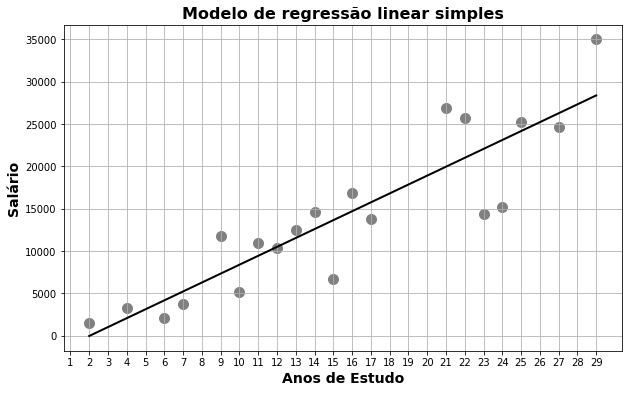

In [22]:
plt.figure(figsize=[10,6])
plt.title("Modelo de regressão linear simples", fontweight = 'bold', fontsize = 16)
plt.scatter(df['Anos de Estudo'], df['Salário'], s = 100, c = 'gray')
plt.xlabel("Anos de Estudo", fontweight = 'bold', fontsize = 14)
plt.ylabel("Salário", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,30))

plt.plot(X, ypred, c = 'black', lw = 2)
plt.grid()

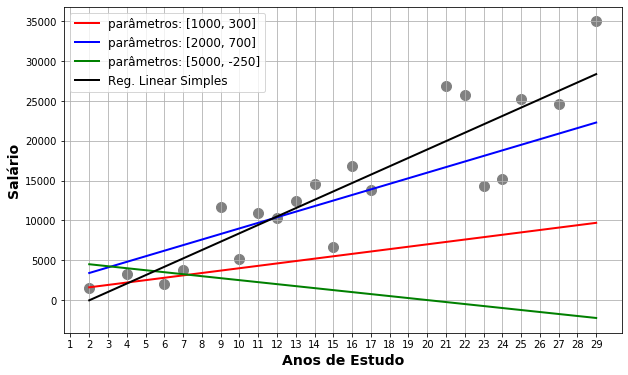

In [23]:
X = df['Anos de Estudo']
y1 = funcao_linear(X, theta0 = 1000, theta1 = 300)
y2 = funcao_linear(X, theta0 = 2000, theta1 = 700)
y3 = funcao_linear(X, theta0 = 5000, theta1 = -250)


plt.figure(figsize=[10,6])
plt.scatter(df['Anos de Estudo'], df['Salário'], s = 100, c = 'gray')
plt.xlabel("Anos de Estudo", fontweight = 'bold', fontsize = 14)
plt.ylabel("Salário", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,30))
plt.grid()

plt.plot(X, y1, label = 'parâmetros: [1000, 300]', lw = 2, c = 'red')
plt.plot(X, y2, label = 'parâmetros: [2000, 700]', lw = 2, c = 'blue')
plt.plot(X, y3, label = 'parâmetros: [5000, -250]', lw = 2, c = 'green')
plt.plot(X, ypred, c = 'black', lw = 2, label = 'Reg. Linear Simples')
plt.legend(fontsize = 12)
plt.show()

Quais a combinação de parâmetros que o modelo de regressão linear simples usa?

( $\theta_0$ também é conhecido como __intercepto__; $\theta_1$ é o coeficiente )

In [24]:
lm.intercept_, lm.coef_

(array([-2136.63923074]), array([[1052.312002]]))

Bacana! Neste ponto, já sabemos usar um modelo de aprendizado de máquina, bem como medir quantitativamente o nível de erro que o modelo está cometendo.

A fim de aumentar nosso conhecimento no assunto, vamos na sequência discutir sobre outro modelo muito conhecido e que possui uma lógica de aprendizado muito diferente do modelo de regressão linear.

<br><br>

# K-Nearest Neighbor 
### Também conhecido como K-NN.
### Em português: K-vizinho mais próximo.

<br>

A lógica de aprendizado desse algoritmo é bem diferente do que a regressão linear simples, vista acima.

Neste caso, o algoritmo considera apenas os __vizinhos mais próximos__ no dataset de treino para fazer a predição.

Além disso, o __KNN pode ser usado tanto para regressão quanto para classificação.__

Vejamos um exemplo para facilitar o entendimento: 

In [25]:
#função auxiliar

def KNN_plot(new_X1, new_X2):
    axis_X1 = [1,1.5,2,2.5,1.7,3,4,5,6]
    axis_X2 = [1, 0.8, 1.2,3., 1.4, 4, 4.2, 3.6, 5]
    label__ = [0,0,0,0,0,1,1,1,1]
    dframe = pd.DataFrame(np.c_[axis_X1, axis_X2, label__], columns = ['x1', 'x2', 'y'])
    plt.figure(figsize=[8,6])
    plt.scatter(dframe.loc[dframe.y==0].x1, dframe.loc[dframe.y==0].x2, c = 'red', s = 120, label = 'classe vermelha')
    plt.scatter(dframe.loc[dframe.y==1].x1, dframe.loc[dframe.y==1].x2, c = 'blue', s = 120, label = 'classe azul')
    plt.grid()
    plt.scatter(new_X1, new_X2, s = 200, c = 'gray', label = 'qual classe??')
    plt.legend(fontsize = 15, bbox_to_anchor=[1., 1.])
    plt.show()

Exemplos:

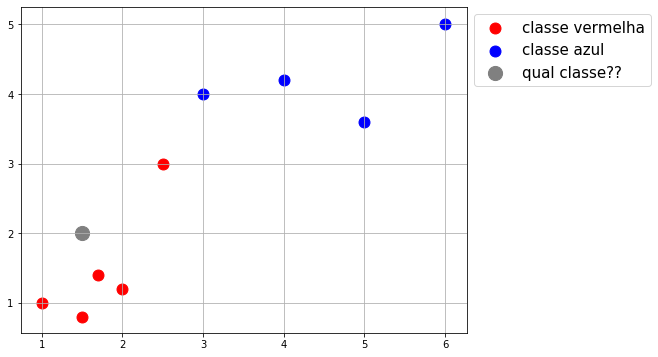

In [26]:
KNN_plot(1.5, 2)

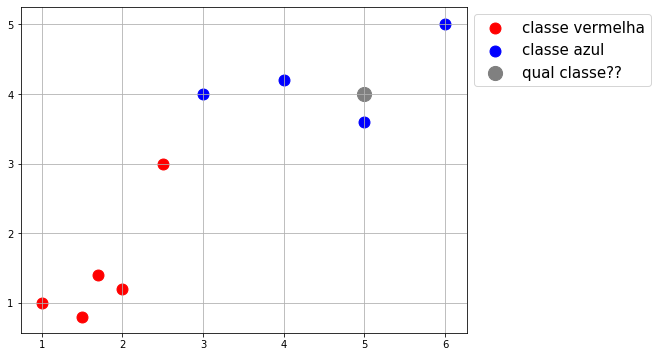

In [27]:
KNN_plot(5, 4)

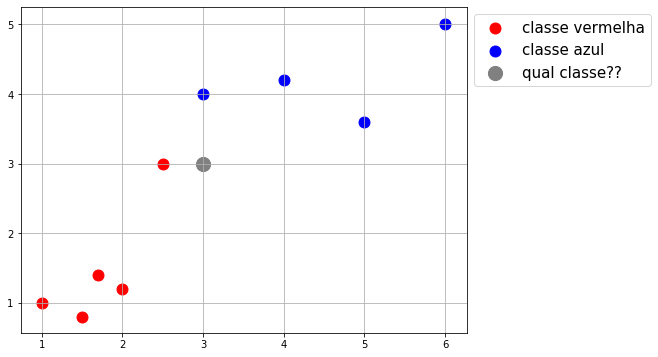

In [28]:
KNN_plot(3, 3)

<br>

# K-NN 

Primeiramente, fixamos o valor de __K__, a __quantidade de vizinhos__ a ser considerada.

<br>

### Classificação:

A predição é dada pelo __voto majoritário__ da variável target __desses vizinhos mais próximos.__

### Regressão:

A predição é dada pela __média__ da variável target __desses vizinhos mais próximos.__


<br><br>

__Vamos a um exemplo:__

Considere o dataset abaixo, contendo informações de 9 casas. Temos a quantidade de quartos, a área da casa (em metros quadrados) e o preço de venda.

Dataset:
   qtd_quartos  area  preco
0            1    30  16000
1            1    40  18000
2            1    50  20000
3            2    40  28000
4            2    70  34000
5            2    55  31000
6            3   100  50000
7            3    70  44000
8            4    95  59000



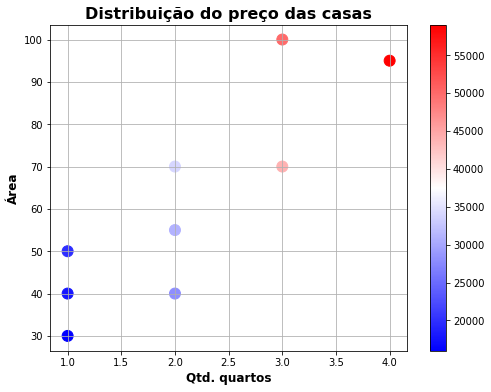

In [29]:
qtd_quartos = [1,1,1,2,2,2,3,3,4]
area = [30, 40, 50, 40, 70, 55, 100,70, 95]
preco = np.array(qtd_quartos) * 10000 + np.array(area) * 200

dframe = pd.DataFrame(np.c_[qtd_quartos, area, preco], columns = ['qtd_quartos', 'area', 'preco'])
print("Dataset:")
print(dframe)
print()
plt.figure(figsize=[8,6])
plt.scatter(dframe.qtd_quartos, dframe.area, c = preco, cmap = plt.cm.bwr, s = 120)
plt.colorbar()
plt.grid()
plt.title("Distribuição do preço das casas", fontweight = 'bold', fontsize = 16)
plt.xlabel("Qtd. quartos", fontweight = 'bold', fontsize = 12)
plt.ylabel("Área", fontweight = 'bold', fontsize = 12)
plt.show()

__Pergunta: Quanto custa uma casa com 1 quarto e tem 60 metros quadrados de área?__

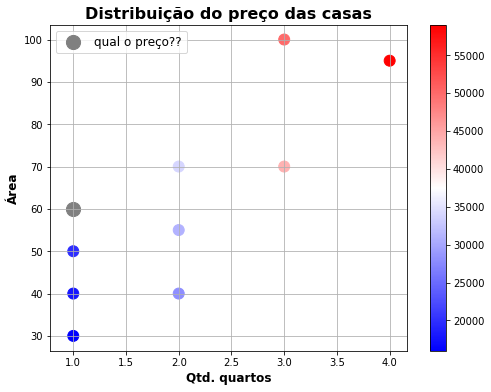

In [30]:
qtd_quarto_novo = 1
area_novo = 60

plt.figure(figsize=[8,6])
plt.scatter(dframe.qtd_quartos, dframe.area, c = preco, cmap = plt.cm.bwr, s = 120)
plt.colorbar()
plt.grid()
plt.title("Distribuição do preço das casas", fontweight = 'bold', fontsize = 16)
plt.xlabel("Qtd. quartos", fontweight = 'bold', fontsize = 12)
plt.ylabel("Área", fontweight = 'bold', fontsize = 12)
plt.scatter(qtd_quarto_novo, area_novo, s = 200, c = 'gray', label = 'qual o preço??')
plt.legend(bbox_to_anchor = [0.4,1], fontsize = 12)
plt.show()

Vamos usar o algoritmo KNN - Regressão do scikit-learn para responder essa pergunta!

A sintaxe de uso desse algorito é muito similar a da regressão linear - o que facilita muito o trabalho.

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
dframe

,qtd_quartos,area,preco
0,1,30,16000
1,1,40,18000
2,1,50,20000
3,2,40,28000
4,2,70,34000
5,2,55,31000
6,3,100,50000
7,3,70,44000
8,4,95,59000


In [33]:
X = dframe[['qtd_quartos', 'area']].values
y = dframe.preco.values

type(X), X.shape

(numpy.ndarray, (9, 2))

Instanciando um KNN - considerando 3 vizinhos:

In [34]:
knn = KNeighborsRegressor(n_neighbors = 3)

In [35]:
knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [36]:
#criando a casa cujo preço queremos estimar

nova_casa = np.array([[1, 60]])

In [37]:
#predição

knn.predict(nova_casa)

array([28333.33333333])

Portanto, usando o KNN com __3 vizinhos__, o valor da casa foi de R$28333,33 reais!
E se tivéssemos usado apenas 1 vizinho? e 5 vizinhos?

Vamos rodar um __loop for__ na quantidade de vizinhos, de 1 até 9 e ver como o preço da casa irá variar:

In [38]:
for num_vizinhos in range(1,10):
    
    knn = KNeighborsRegressor(n_neighbors = num_vizinhos)
    knn.fit(X, y)
    pred__ = knn.predict(nova_casa)[0]
    
    print("Número de vizinhos: ", num_vizinhos, " ~ preço estimado: ", pred__)

Número de vizinhos:  1  ~ preço estimado:  31000.0
Número de vizinhos:  2  ~ preço estimado:  25500.0
Número de vizinhos:  3  ~ preço estimado:  28333.333333333332
Número de vizinhos:  4  ~ preço estimado:  32250.0
Número de vizinhos:  5  ~ preço estimado:  29400.0
Número de vizinhos:  6  ~ preço estimado:  29166.666666666668
Número de vizinhos:  7  ~ preço estimado:  27285.714285714286
Número de vizinhos:  8  ~ preço estimado:  31250.0
Número de vizinhos:  9  ~ preço estimado:  33333.333333333336


### Conclusão: 
O __KNN__, assim como vários outros algoritmos que iremos estudar, __é bastante dependente dos parâmetros que setamos no algoritmo.__

Esses parâmetros, como são setados antes do modelo ser fitado nos dados, são também chamados de __hiper-parâmetros.__


Cabe ao __cientista de dados__ analisar o problema em questão e __descobrir qual é om melhor parâmetro__ a ser usado neste caso!

<br><br>

### Retomando a questão: prever o salário de uma pessoa, a partir da quantidade de anos estudados...

Vamos retomar ao nosso problema de predição de salário a partir da quantidade de anos estudados e ver como o KNN - Regressor se comporta.

In [39]:
df

,Anos de Estudo,Salário
0,2.0,1559.0
1,4.0,3312.0
2,6.0,2078.0
3,7.0,3758.0
4,9.0,11724.0
5,10.0,5128.0
6,11.0,10965.0
7,12.0,10354.0
8,13.0,12457.0
9,14.0,14621.0


In [40]:
X = df['Anos de Estudo'].values.reshape(-1,1)
y = df['Salário'].values

In [41]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

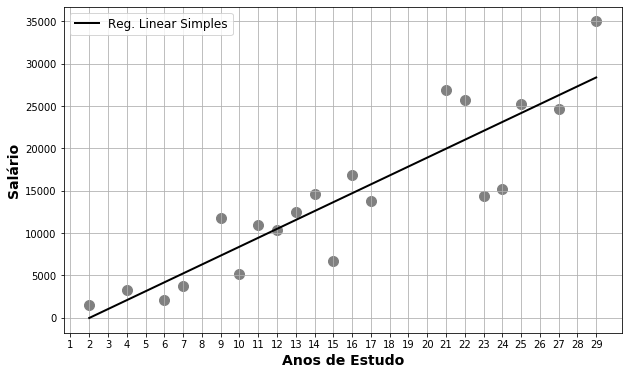

In [42]:
plt.figure(figsize=[10,6])
plt.scatter(df['Anos de Estudo'], df['Salário'], s = 100, c = 'gray')
plt.xlabel("Anos de Estudo", fontweight = 'bold', fontsize = 14)
plt.ylabel("Salário", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,30))
plt.grid()

lm_preds = lm.predict(X)
plt.plot(X, lm_preds, c = 'black', lw = 2, label = 'Reg. Linear Simples')
plt.legend(fontsize = 12)
plt.show()

Como já discutimos, o __modelo de regressão linear simples__ parece descrever bem a relação entre anos de estudo e salário. Além disso, vimos que o RMSE neste caso estava em torno de 4146.

Vamos agora usar o KNN - Regressor para modelar a relação entre essas variáveis!

Instanciando um KNN com 5 vizinhos, temos o seguinte resultado para o RMSE:

In [43]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X, y)
print("RMSE do KNN com 5 vizinhos: ", RMSE(y = y, y_pred = knn.predict(X)))

RMSE do KNN com 5 vizinhos:  4750.053603908065


Vemos que o erro ficou um pouco maior...

E como seria o comportamento do RMSE caso variássemos a quantidade de vizinhos??

Vejamos no loop abaixo:

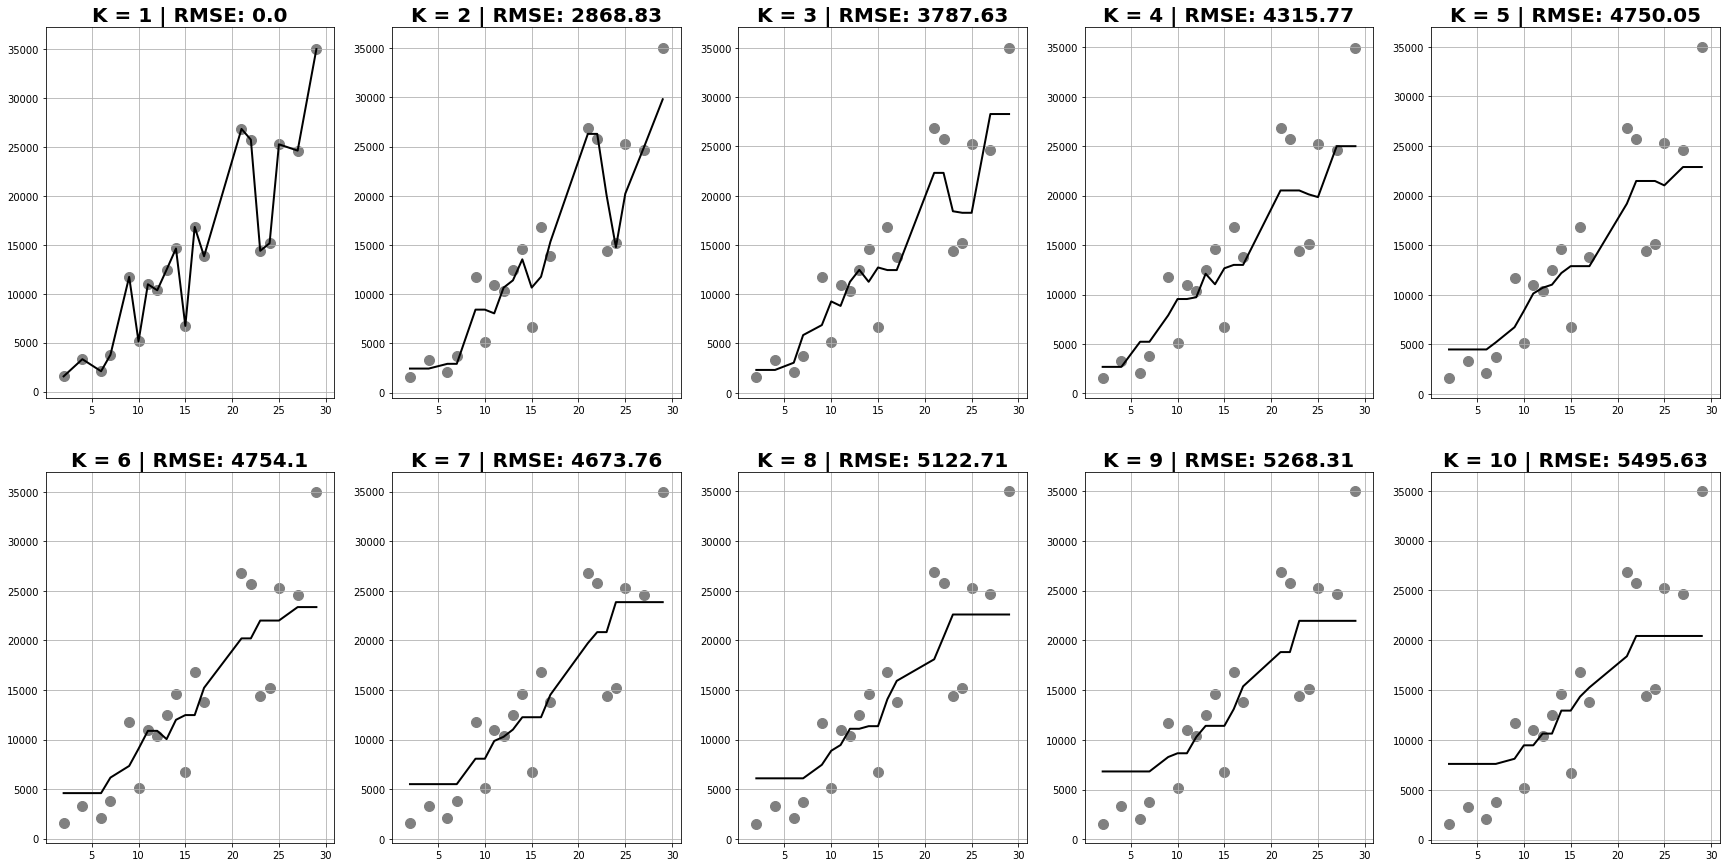

In [44]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(df['Anos de Estudo'], df['Salário'], s = 100, c = 'gray')
    plt.grid()

plt.show()

KNN(K = 1) está com RMSE igual a zero! 

A principio, parece que essa parametrização do KNN é a melhor de todas, sendo impossível achar um algoritmo melhor.

No entanto, o objetivo dos algoritmos de machine é de __generalizar__ bem, a partir dos padrões aprendidos no dataset de treinamento.

Quando um modelo não generaliza bem, dizemos que o modelo está sofrendo de __overfitting__: nesse caso, o modelo aprendeu não apenas os padrões dos dados, mas também aprendeu os ruídos, sendo incapaz de generalizar os resultados e manter a performance em outros conjuntos de dados ainda não vistos.


Vamos carregar outro dataset, com um __padrão similar ao padrão apresentado nos dados de treinamento__ e ver como os modelos se comportam nesses novos dados:

In [45]:
#Dataset original
df = pd.read_csv("dataset_modulo_8.csv").drop("Unnamed: 0", axis = 1)
df.head()

,Anos de Estudo,Salário
0,2.0,1559.0
1,4.0,3312.0
2,6.0,2078.0
3,7.0,3758.0
4,9.0,11724.0


In [46]:
#Dataset novo - com padrão similar ao dataset original 
df_novo = pd.read_csv("dataset_modulo_8_dados_teste.csv").drop("Unnamed: 0", axis = 1)
df_novo.head()

,Anos de Estudo,Salário
0,1.0,1192.0
1,2.0,1758.0
2,3.0,3805.0
3,4.0,3938.0
4,6.0,6307.0


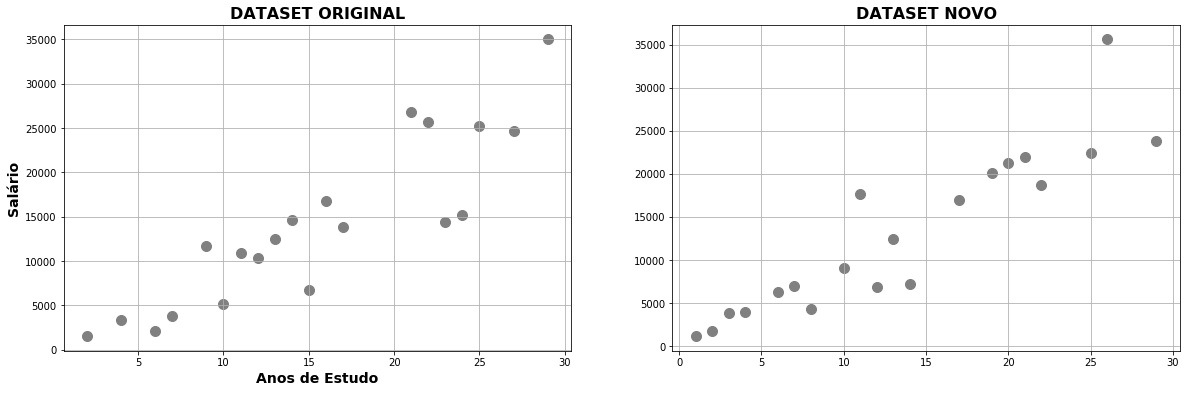

In [47]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title("DATASET ORIGINAL", fontsize = 16, fontweight = 'bold')
plt.scatter(df['Anos de Estudo'], df['Salário'], s = 100, c = 'gray')
plt.grid()
plt.xlabel("Anos de Estudo", fontsize = 14, fontweight = 'bold')
plt.ylabel("Salário", fontsize = 14, fontweight = 'bold')
plt.subplot(1,2,2)
plt.title("DATASET NOVO", fontsize = 16, fontweight = 'bold')
plt.scatter(df_novo['Anos de Estudo'], df_novo['Salário'], s = 100, c = 'gray')
plt.grid()
plt.show()

Agora, a fim de __estudarmos overfitting__ e a __capacidade de generalização de um algoritmo__ de machine learning, vamos seguir os passos:

1 - __Instanciar__ alguns modelos:

    - Regressão Linear Simples
    
    - KNN(K = 1)
    
    - KNN(K = 6)
    
    - KNN(K = 12)
    
2 - __fitar__ esses modelos no dataset original (__dataset de treino__);

3 - __plotar a curva__ aprendida por cada modelo no __dataset de treino e avaliar o RMSE__; analogamente, fazer o mesmo para o __dataset novo__: desta forma conseguimos __comparar os resultados dos modelos nos dados de treino e em dados novos__ ("dados não vistos pelo modelo") a fim de analisar o overfitting e a capacidade de generalização dos modelos.

In [48]:
def plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo):
    
    modelo.fit(X, y)
    
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_novo = modelo.predict(Xnovo)
    
    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_novo = np.round(RMSE(y = ynovo, y_pred = predicao_dataset_novo), 2)
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, y, c = 'gray', s = 100)
    plt.plot(X, predicao_dataset_treino, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET NOVO: " + str(rmse_dataset_novo),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(Xnovo, ynovo, c = 'gray', s = 100)
    plt.plot(Xnovo, predicao_dataset_novo, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

In [49]:
X = df['Anos de Estudo'].values.reshape(-1,1)
y = df['Salário'].values
Xnovo = df_novo['Anos de Estudo'].values.reshape(-1,1)
ynovo = df_novo['Salário'].values

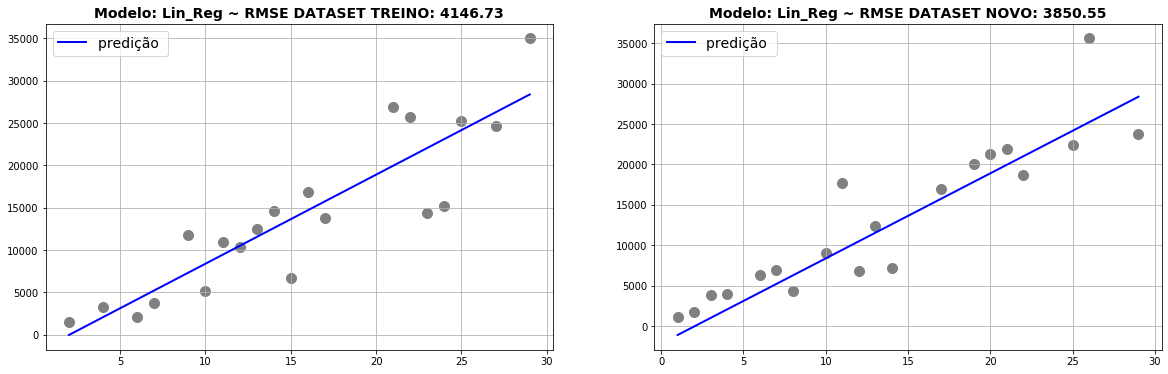

In [50]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

Como foi comentado acima, o objetivo principal de algoritmos de machine learning é a capacidade de generalizar.

Em termos quantitativos, é esperado que as métricas (RMSE, neste caso) se mantenham em outros datasets.

No caso da regressão linear, vemos uma leve variação do RMSE (o que é normal) no dataset novo, mas os valores são similares.

Além disso, fica evidente que a reta de regressão ainda descreve os dados novos, mesmo tendo sido treinada apenas no
dataset de treinamento.

Abaixo, iremos analisar os resultados para versões do KNN - Regressor:

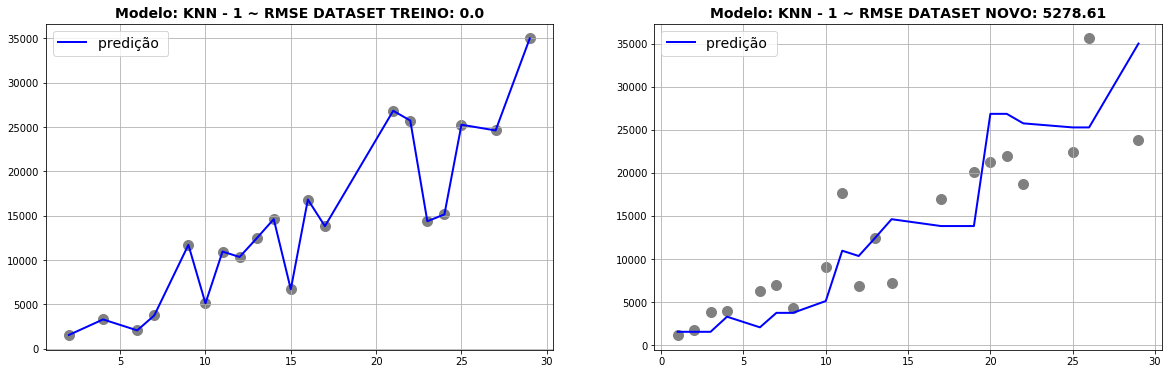

In [51]:
modelo = KNeighborsRegressor(n_neighbors = 1)
nome_modelo = 'KNN - 1'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

Considerando apenas 1 vizinho, fica evidente que o KNN(K=1) não generalizou bem.

O nível de erro em treino foi 0, mas teve um alto nível de erro no dataset novo.

Neste caso em particular, dizemos que o modelo KNN(K=1) está sofrendo de __overfitting__: o erro de treinamento é muito baixo, mas o erro em dados ainda não vistos (dataset novo) é muito alto, comparado com o erro de treinamento.

__Overfitting é um problema crucial em machine learning e o cientista de dados deve saber reconhecê-lo e tratá-lo.__

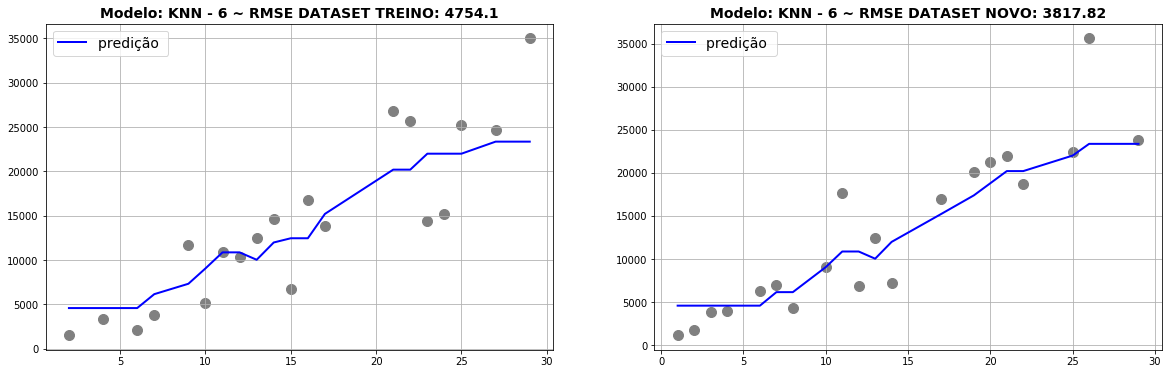

In [52]:
modelo = KNeighborsRegressor(n_neighbors = 6)
nome_modelo = 'KNN - 6'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

Neste caso, o KNN(K=6) está generalizando bem, conforme podemos ver pelos gráficos e também ao analisar quantitativamente os valores de RMSE em treino e no dataset novo.

Além disso, sua performance é bastante similar ao modelo de regressão linear simples, o que também pode ser confirmado pelos RMSE's.

Ainda, também fica claro que este modelo não está sofrendo de overfitting. Desta forma, entre o KNN(K=1) e o KNN(K=6), o modelo com 6 vizinhos é o preferível para modelar esses dados.

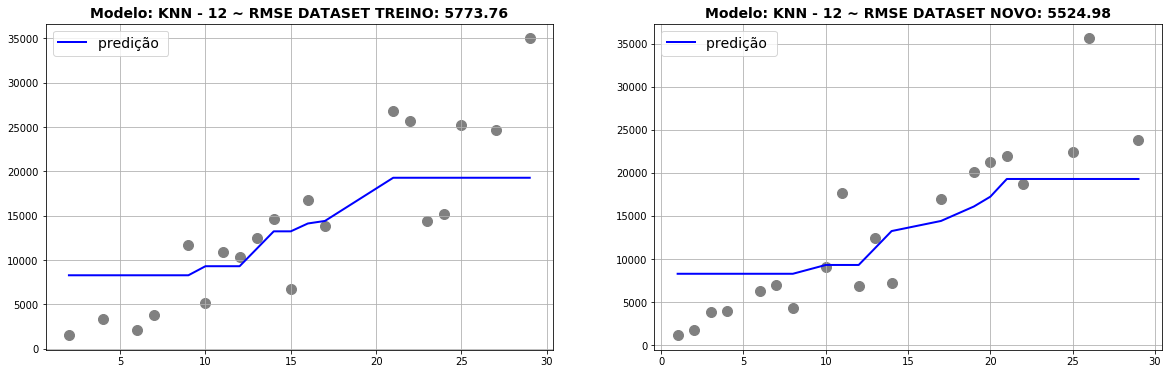

In [53]:
modelo = KNeighborsRegressor(n_neighbors = 12)
nome_modelo = 'KNN - 12'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

Finalmente, ao analisar o KNN(K=12) vemos outro padrão interessante.

Antes de mais nada, é evidente que o KNN(K=12) não está sofrendo de overfitting.

No entanto, vemos que o modelo em questão __não descreve bem os dados, nem mesmo no dataset de treino.__

Esse fenômeno é conhecido como __underfitting__: o modelo que sofre de underfitting não consegue aprender o padrão do dataset de treino, nem mesmo generalizar para outros conjuntos de dados.

Desta forma, esse modelo não é interessante para descrever o comportamento dos dados, visto que suas predições e generalizações estarão com erros demasiadamente grandes.


### Conclusão:

Nesta simulação, entendemos os conceitos fundamentais de __overfitting__ e __underfitting__.

No entanto, usamos um artifício que na prática do dia-a-dia não teremos: o dataset novo.

Isto é, na prática, iremos ter apenas um dataset, o dataset de treinamento. Desta forma, o dataset novo não existe na prática.

Portanto... se o dataset novo não existe na prática.. __como iremos avaliar se nossos modelos estão sofrendo de overfitting ou underfitting?__

#### Resposta:

O único jeito de saber se nossos modelos estão generalizando bem é realmente testando-os em novos dados. Uma possibilidade seria colocar o modelo em produção e ir analisando os resultados ao longo do tempo, mas isso pode ser muito arriscado.

Uma melhor alternativa é dividir os dados em dois datasets disjuntos: __dataset de treino__ e __dataset de teste__!
Neste caso, o modelo é treinado apenas no dataset de treino; iremos usar o dataset de teste para validar as métricas de performance do modelo.

Desta forma, caso o erro em treino seja baixo mas o erro em teste seja alto, estaremos com overfitting.

Ainda sobre essa divisão, é muito comum usar 20-30% da base de dados para o dataset de teste; o restante para treino.

Portanto, __avaliar um modelo de machine learning específico é muito simples: basta usarmos um conjunto de teste.__

No entanto, e se tivermos em dúvida entre dois modelos distintos? Como vimos acima, uma opção é treinar os dois modelos num dataset de treinamento e compará-los num dataset de teste.

No exemplo acima, a regressão linear ficou muito similar ao KNN em questão. Mas... e se tivéssemos usado outra quantidade de vizinhos? (isto é, se tivéssemos setado o KNN com outro hiper-parâmetro)

Uma opção seria instanciar vários KNN's, cada um com uma quantidade diferente de vizinhos e seguir o procedimento: treinar os modelos nos dados de treinamento e avaliá-los em teste.

O que poderia dar errado nessa abordagem?

Neste caso, nós estaríamos testando os modelos várias vezes no conjunto de teste, então corremos o risco de viesarmos nossos resultados, encontrando o modelo que melhor descreve __esse conjunto de teste em particular__, não necessariamente sendo um modelo que generaliza bem!

Para contornarmos esse problema e tentarmos diminuir esse viés, uma abordagem muito usada é:

<br>

### Divisão dos dados em treino / validação / teste

<br>

Os passos dessa divisão são:


1- Dividimos o dataset inteiro em duas partes: uma de treino e uma de teste;

2- Separamos um pedaço do dataset de treino: conhecido como dataset de validação;

3- Iremos treinar os modelos apenas na parte de treino que não contém o dataset de validação!

4- Usaremos o dataset de validação para escolher o melhor modelo, dentre vários que serão testados.

5- Finalmente, uma vez elencado o melhor no modelo - de acordo com as métricas de performance no dataset de validação - iremos testá-lo no dataset de teste para analisarmos se as métricas no dataset de validação se mantém no dataset de teste.

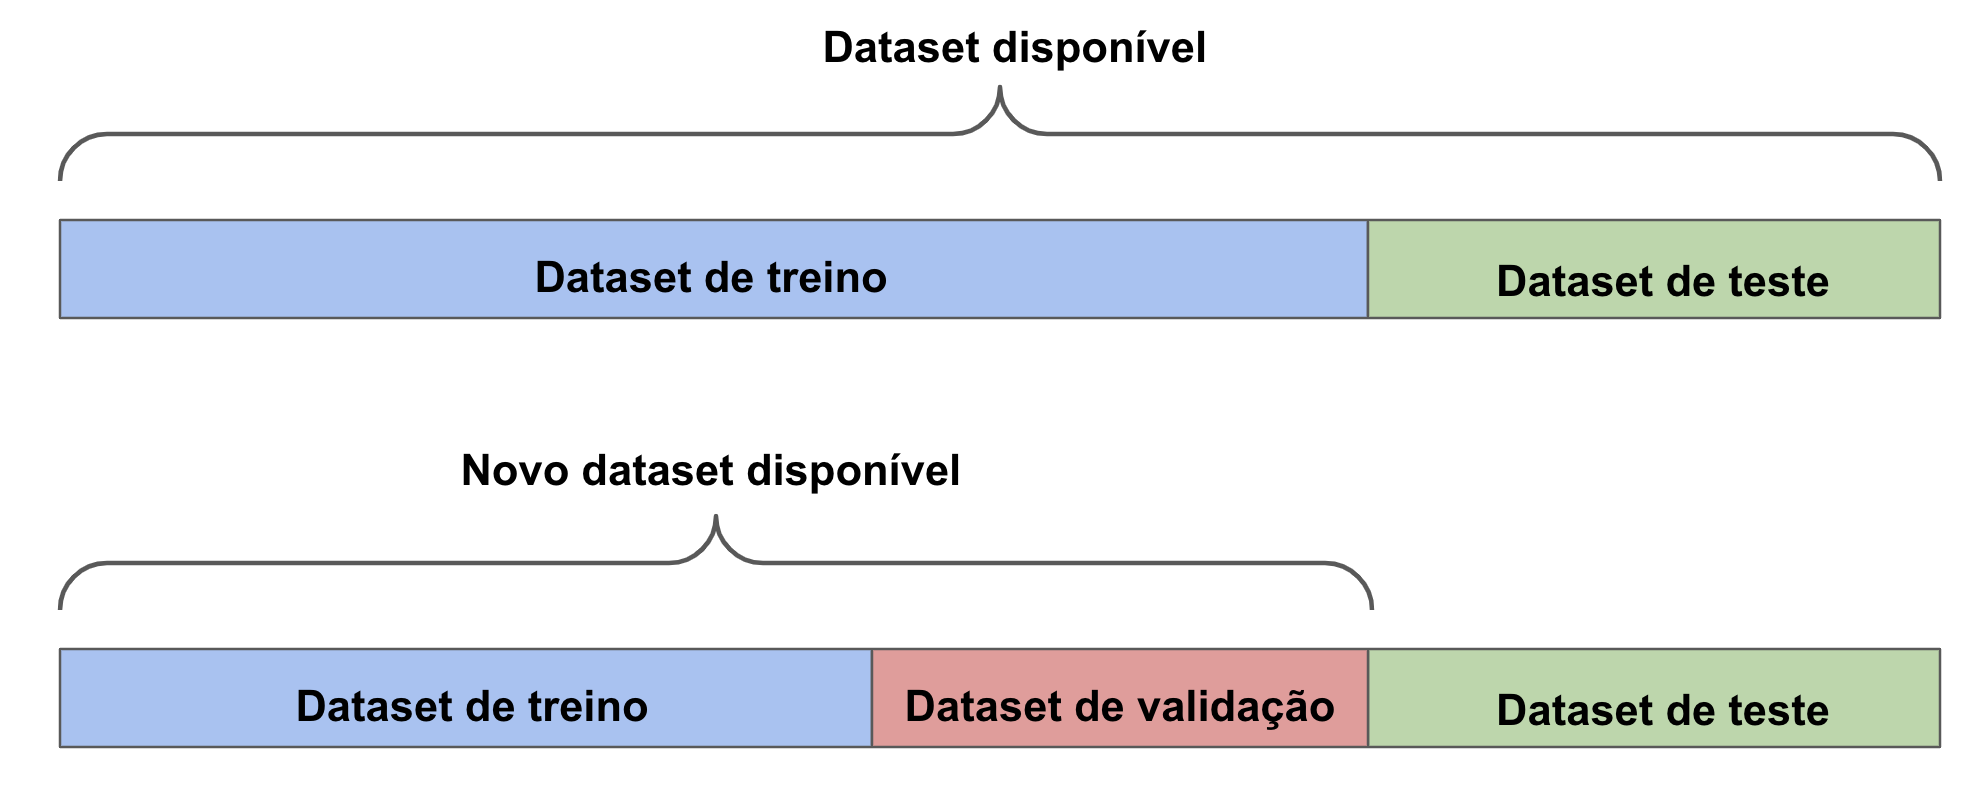

A figura acima ilustra a divisão dos dados originais nos conjuntos de treino, validação e teste.

Abaixo, exemplificamos como seriam treinados múltiplos modelos distintos a afim de escolher o melhor modelo para a questão.

Usamos o __conjunto de treino__ para __fitar__ todos os modelos. Usamos o __conjunto de validação__ para prever os resultados dos modelos e, ainda neste conjunto, calculamos as métricas de performance. O modelo com a melhor métrica de performance é o escolhido como modelo final. Finalmente, usamos o __conjunto de teste__ para testar este modelo final e comparar as métricas de performance deste modelo nos dados de validação e teste, de modo a __medir a capacidade de generalização do modelo__. 

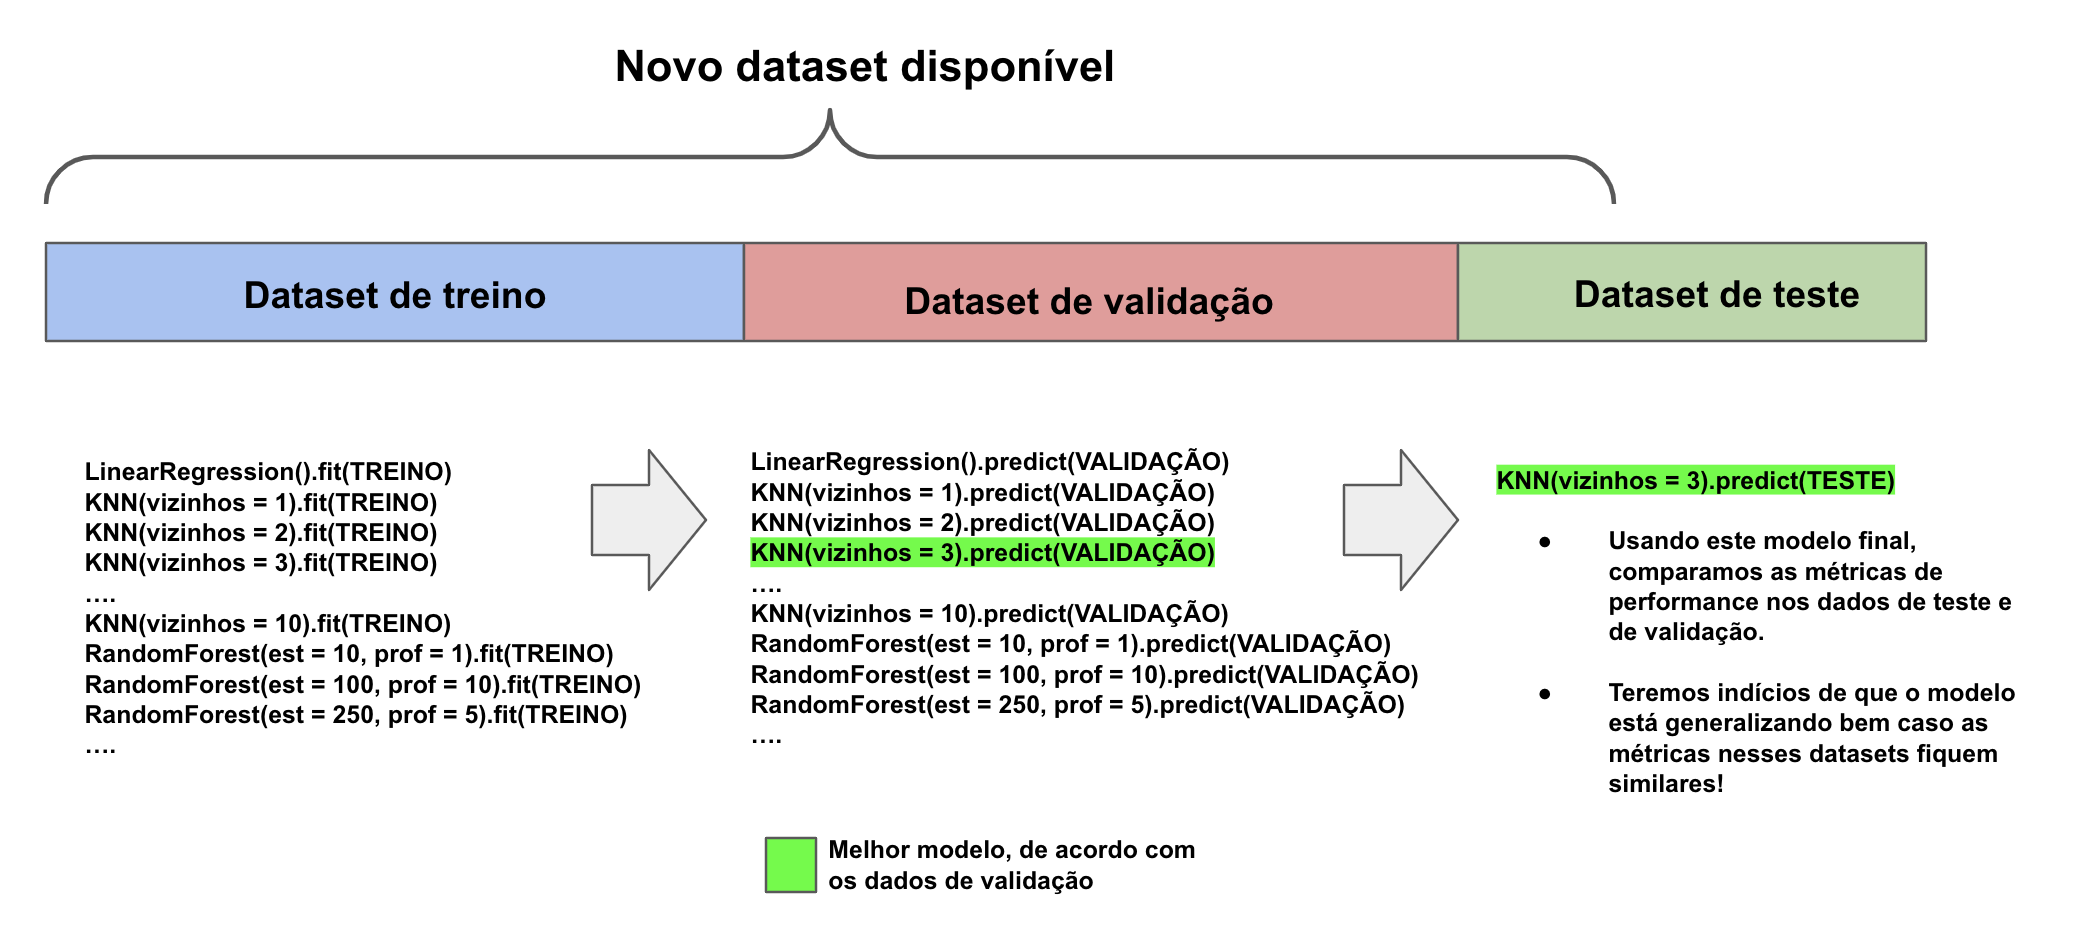